### 0. Modulos y datos

In [8]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [9]:
Xtrain = pd.read_csv('../data/processed/SplitData/NormData/Clean_Xtrain_norm.csv')
Xtest = pd.read_csv('../data/processed/SplitData/NormData/Clean_Xtest_norm.csv')
ytrain = pd.read_csv('../data/processed/SplitData/Clean_ytrain.csv')
ytest = pd.read_csv('../data/processed/SplitData/Clean_ytest.csv')

### 1. Boostig
#### 1.1 Train

In [10]:
boosting_model = XGBClassifier(random_state=42)
boosting_model.fit(Xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### 1.2 Prediccion y test

In [11]:
ypred = boosting_model.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7229437229437229


#### 1.3 Optimizacion

In [15]:
from typing import Any


from numpy import dtype, floating, ndarray
from numpy._typing import _64Bit


n_estimators_values: list[int] = [2, 3, 4, 5, 6, 8, 10]
max_depth_values: list[int] = [0, 3, 5, 7, 10]
gamma_values: list[int] = [2, 5, 10, 15, 20]

accuracy_matrix: ndarray[Any, dtype[floating[_64Bit]]] = np.zeros(shape=(len(n_estimators_values), len(max_depth_values),len(gamma_values)))

for i, n_estimators in enumerate(n_estimators_values):
    for j, depth in enumerate(max_depth_values):
        for k, Gamma in enumerate(gamma_values):
            boosting_model = XGBClassifier(n_estimators=n_estimators, max_depth=depth, gamma=Gamma, random_state=42)        
            boosting_model.fit(Xtrain, ytrain)
            
            ypred = boosting_model.predict(Xtest)    
            accuracy = accuracy_score(y_true=ytest, y_pred=ypred)
            
            accuracy_matrix[i, j, k] = accuracy

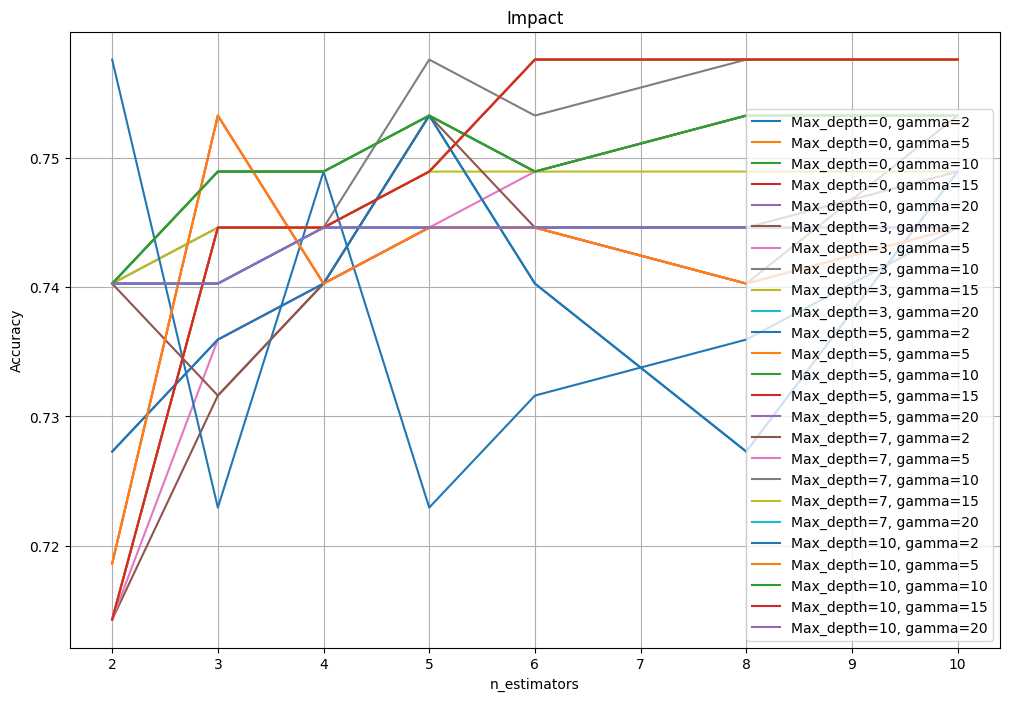

In [16]:
plt.figure(figsize=(12, 8))
for j, depth in enumerate(max_depth_values):
    for k, Gamma in enumerate(gamma_values):
        plt.plot(n_estimators_values, accuracy_matrix[:, j, k], label=f"Max_depth={depth}, gamma={Gamma}")

plt.xlabel(xlabel='n_estimators')
plt.ylabel(ylabel='Accuracy')
plt.title(label='Impact')
plt.legend()
plt.grid(visible=True)

Optimo en: max_depth=3, gamma=10, n_estimators=5 (gris)



In [14]:
import pickle
optimal_model = XGBClassifier(n_estimators=n_estimators, max_depth=depth, gamma=Gamma, random_state=42)        
optimal_model.fit(Xtrain, ytrain)
with open('../data/processed/Models/Boostrap-n_5-depth_3-g_10.pkl', 'wb') as f:
    pickle.dump(optimal_model, f)